<a href="https://colab.research.google.com/github/Zenith1618/Plant-Disease-Classification/blob/main/Plant_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries


In [1]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!nvidia-smi

Tue Mar 21 14:20:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    26W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [78]:
import os
import numpy as np
import pandas as pd
import torch    #Pytorch module
from pprint import pprint

import matplotlib.pyplot as plt

import torch.nn as nn     #for creating neural network
from torch.utils.data import DataLoader
from PIL import Image   #for checking images
import torch.nn.functional as F   # for functions to calculate loss
import torchvision.transforms as transforms   # for transforming images into tensors
from torchvision.utils import make_grid   # for checking the data
from torchvision.datasets import ImageFolder    # for working with classes and images
from torchsummary import summary    # to get summary of the  model

# Importing Dataset

In [4]:
!unzip /content/drive/MyDrive/Dataset/Plant_Disease.zip > /dev/null



# Exploratory Data Analysis

In [5]:
data_dir = "/content/Plant_Disease"

train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"

diseases = os.listdir(train_dir)

In [6]:
pprint(diseases)

['Corn_(maize)___Northern_Leaf_Blight',
 'Tomato___Tomato_mosaic_virus',
 'Peach___healthy',
 'Cherry_(including_sour)___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Late_blight',
 'Tomato___Bacterial_spot',
 'Potato___healthy',
 'Squash___Powdery_mildew',
 'Grape___Esca_(Black_Measles)',
 'Pepper,_bell___Bacterial_spot',
 'Tomato___Target_Spot',
 'Blueberry___healthy',
 'Potato___Late_blight',
 'Apple___healthy',
 'Tomato___Leaf_Mold',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Corn_(maize)___healthy',
 'Raspberry___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Cherry_(including_sour)___Powdery_mildew',
 'Corn_(maize)___Common_rust_',
 'Tomato___Early_blight',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Tomato___Septoria_leaf_spot',
 'Tomato___healthy',
 'Grape___Black_rot',
 'Apple___Black_rot',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Soybean___healthy',
 'Strawberry___healthy',
 'Apple___Ap

In [7]:
print("Total disease classes are: {}".format(len(diseases)))

Total disease classes are: 38


In [8]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
  if plant.split('___')[0] not in plants:
    plants.append(plant.split('___')[0])
  if plant.split('___')[1] != 'healthy':
    NumberOfDiseases += 1

# This piece of code gives unique plants and number of unique diseases

In [9]:
print(f"Unique Plants are: \n{plants}")

Unique Plants are: 
['Corn_(maize)', 'Tomato', 'Peach', 'Cherry_(including_sour)', 'Strawberry', 'Potato', 'Squash', 'Grape', 'Pepper,_bell', 'Blueberry', 'Apple', 'Raspberry', 'Orange', 'Soybean']


So, we have total of 14 plant leaves images

In [10]:
print("Number of diseases: {}".format(NumberOfDiseases))

Number of diseases: 26


We have 26 types of disease images

In [11]:
# Number of images for each Disease

nums = {}

for disease in diseases:
  nums[disease] = len(os.listdir(train_dir + '/' + disease))


# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])

img_per_class


,no. of images
Corn_(maize)___Northern_Leaf_Blight,1908
Tomato___Tomato_mosaic_virus,1790
Peach___healthy,1728
Cherry_(including_sour)___healthy,1826
Strawberry___Leaf_scorch,1774
Tomato___Late_blight,1851
Tomato___Bacterial_spot,1702
Potato___healthy,1824
Squash___Powdery_mildew,1736
Grape___Esca_(Black_Measles),1920


Visualizing the above info

Text(0.5, 1.0, 'Images per each class of plant disease')

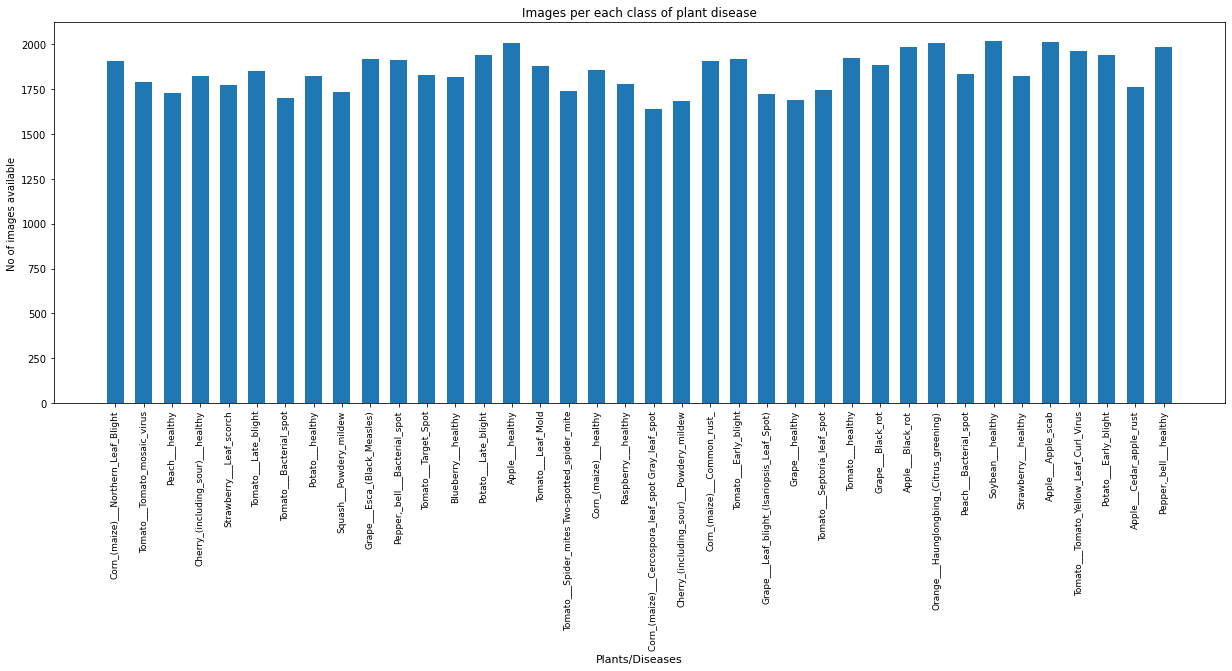

In [12]:
index = [n for n in range(38)]
plt.figure(figsize=(21, 7))
plt.bar(index, [n for n in nums.values()], width=0.6)

plt.xlabel('Plants/Diseases', fontsize=11)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=9, rotation=90)
plt.title('Images per each class of plant disease')



The dataset is almost balanced

In [13]:
# Images available for training

n_train = 0
for value in nums.values():
  n_train += value

print(f"There are {n_train} images for training")

There are 70295 images for training


# Data Preparation

In [14]:
# datasets for validation and training

train = ImageFolder(train_dir, transform=transforms.ToTensor())
valid = ImageFolder(valid_dir, transform=transforms.ToTensor())

torchvision.datasets is a class which helps in loading all common and famous datasets. It also helps in loading custom datasets. 

torchvision.datasets.ImageFolder helps in loading the image data when the data is arranged in this way:

root/dog/xxx.png

root/dog/xxy.png

root/dog/xxz.png



root/cat/123.png

root/cat/nsdf3.png

root/cat/asd932_.png

Next, after loading the data, we need to transform the pixel values of each image (0-255) to 0-1 as neural networks works quite good with normalized data. The entire array of pixel values is converted to torch tensor and then divided by 255.

In [15]:
# Image Shape

img, label = train[0]
print(img.shape, label)

torch.Size([3, 256, 256]) 0


We can see the shape (3, 256 256) of the image. 3 is the number of channels (RGB) and 256 x 256 is the width and height of the image

In [16]:
# Total number of classes in training set
len(train.classes)

38

In [17]:
# Check some images from training dataset

def show_image(image, label):
  print("Label: " + train.classes[label] + "(" + str(label) + ")")
  plt.imshow(image.permute(1,2,0))    # permute is used to reorder dimension of nd array

# Images from Training Dataset

Label: Apple___Apple_scab(0)


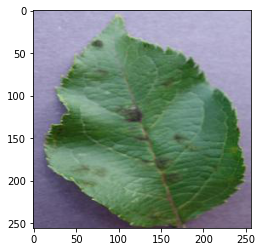

In [18]:
show_image(*train[0])

Label: Cherry_(including_sour)___Powdery_mildew(5)


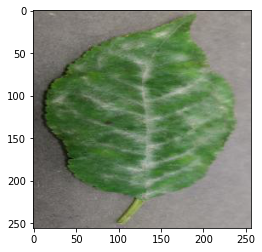

In [19]:
show_image(*train[10000])

Label: Soybean___healthy(24)


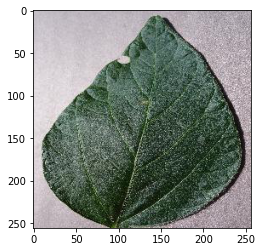

In [20]:
show_image(*train[45000])

In [21]:
# setting the seed value
random_seed = 8
torch.manual_seed(random_seed)

In [22]:
# Setting Batch size

batch_size = 32

batch_size is the total number of images given as input at once in forward propagation of the CNN. Basically, batch size defines the number of samples that will be propagated through the network.

For instance, let's say you have 1050 training samples and you want to set up a batch_size equal to 100. The algorithm takes the first 100 samples (from 1st to 100th) from the training dataset and trains the network. Next, it takes the second 100 samples (from 101st to 200th) and trains the network again. We can keep doing this procedure until we have propagated all samples through of the network.

In [23]:
# DataLoader for training and validation

train_dl = DataLoader(train, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(valid, batch_size, shuffle=True, num_workers=2, pin_memory=True)

* DataLoader is a subclass which comes from torch.utils.data. It helps in loading large and memory consuming datasets. It takes in batch_size which denotes the number of samples contained in each generated batch.

* Setting shuffle=True shuffles the dataset. It is heplful so that batches between epochs do not look alike. Doing so will eventually make our model more robust.

* num_workers, denotes the number of processes that generate batches in parallel. If you have more cores in your CPU, you can set it to number of cores in your CPU.





In [24]:
# To show batch of training instances

def show_batch(data):
  for images, label in data:
    fig, ax = plt.subplots(figsize=(30, 30))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=8).permute(1,2,0))
    break



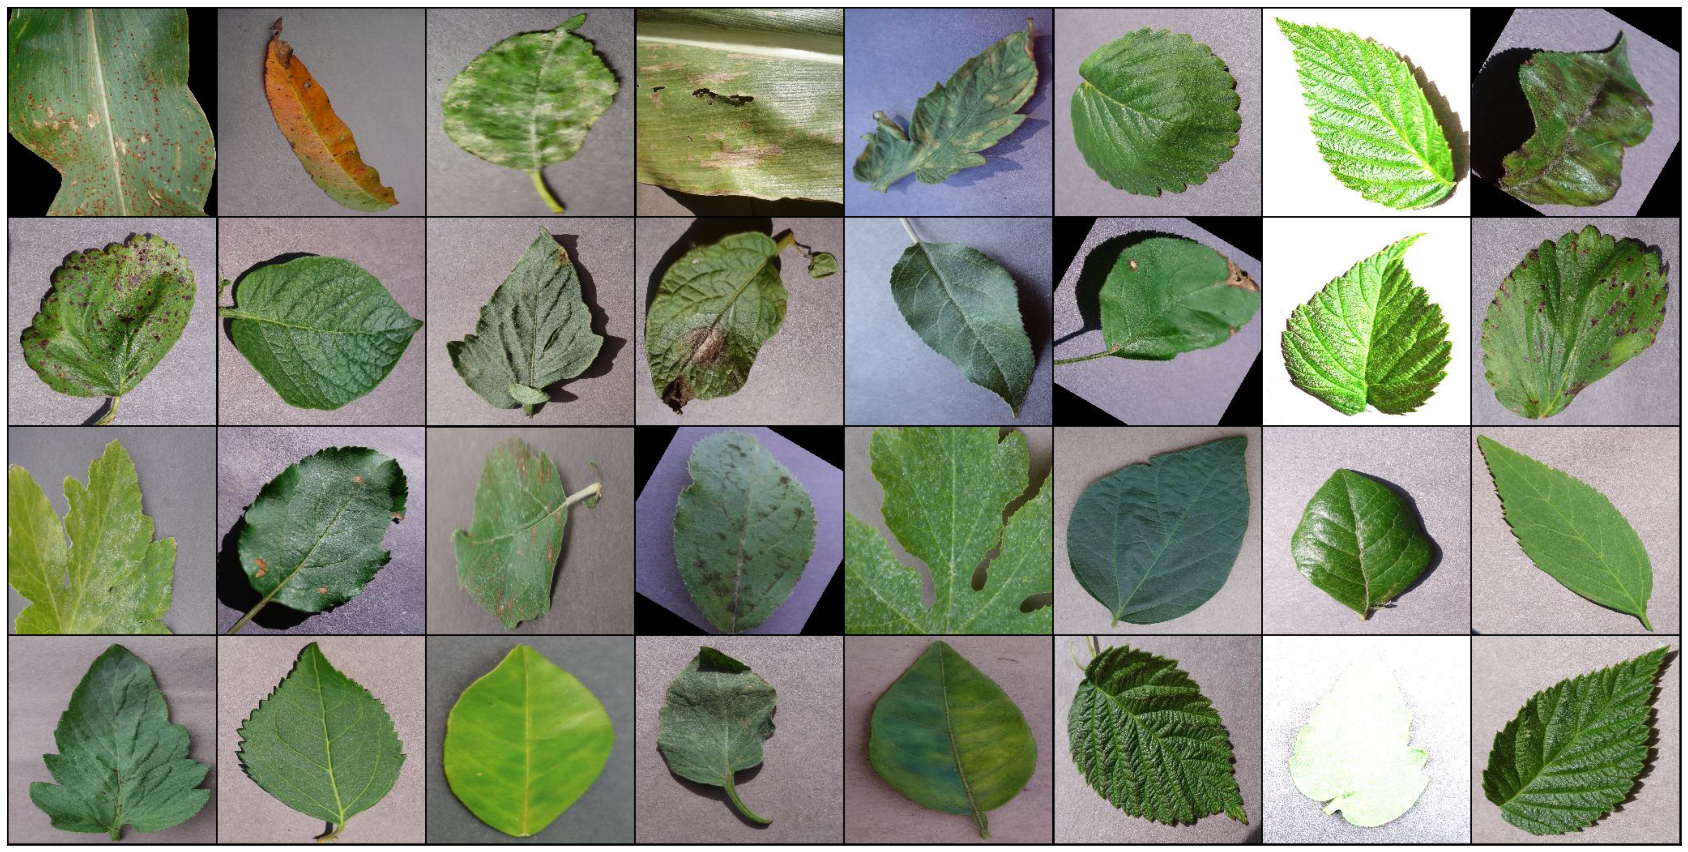

In [25]:
# For the first batch
show_batch(train_dl)

# Modelling

It is advisable to use GPU instead of CPU when dealing with images dataset because CPUs are generalized for general purpose and GPUs are optimized for training deep learning models as they can process multiple computations simultaneously. They have a large number of cores, which allows for better computation of multiple parallel processes. Additionally, computations in deep learning need to handle huge amounts of data — this makes a GPU’s memory bandwidth most suitable. To seamlessly use a GPU, if one is available, we define a couple of helper functions (get_default_device & to_device) and a helper class DeviceDataLoader to move our model & data to the GPU as required

In [26]:
# for moving data into GPU (if available)
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available:
        return torch.device("cuda")
    else:
        return torch.device("cpu")

# for moving data to device (CPU or GPU)
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# for loading in the device (GPU if available else CPU)
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)
        
    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [27]:
# To check the devices we are working on

device = get_default_device()
device

device(type='cuda')

In [28]:
# Moving data into GPU

train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

# Building the Model Arch

We are going to use ResNet

In [29]:
class SimpleResidualBlock(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
    self.relu1 = nn.ReLU()
    self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
    self.relu2 = nn.ReLU()


  def forward(self, x):
    out = self.conv1(x)
    out = self.relu1(out)
    out = self.conv2(out)

    return self.relu2(out) + x

Then we define our **ImageClassificationBase** class whose functions are:

* training_step - To figure out how “wrong” the model is going after training or validation step.We are using this function other than just an accuracy metric that is likely not going to be differentiable (this would mean that the gradient can’t be determined, which is necessary for the model to improve during training)

A quick look at the PyTorch docs that yields the cost function: cross_entropy.

* validation_step - Because an accuracy metric can’t be used while training the model, doesn’t mean it shouldn’t be implemented! Accuracy in this case would be measured by a threshold, and counted if the difference between the model’s prediction and the actual label is lower than that threshold.
* validation_epoch_end - We want to track the validation losses/accuracies and train losses after each epoch, and every time we do so we have to make sure the gradient is not being tracked.
* epoch_end - We also want to print validation losses/accuracies, train losses and learning rate too because we are using learning rate scheduler (which will change the learning rate after every batch of training) after each epoch.


We also define an accuracy function which calculates the overall accuracy of the model on an entire batch of outputs, so that we can use it as a metric in fit_one_cycle

In [30]:
# for calculating the accuracy
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


# base class for the model
class ImageClassificationBase(nn.Module):
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                   # Generate prediction
        loss = F.cross_entropy(out, labels)  # Calculate loss
        acc = accuracy(out, labels)          # Calculate accuracy
        return {"val_loss": loss.detach(), "val_accuracy": acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x["val_loss"] for x in outputs]
        batch_accuracy = [x["val_accuracy"] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()       # Combine loss  
        epoch_accuracy = torch.stack(batch_accuracy).mean()
        return {"val_loss": epoch_loss, "val_accuracy": epoch_accuracy} # Combine accuracies
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_accuracy']))
        

# Final Architecture

In [31]:
def ConvBlock(in_channels, out_channels, pool=False):
  layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)]

  if pool:
    layers.append(nn.MaxPool2d(4))

  return nn.Sequential(*layers)


# resnet architecture 
class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_diseases):
        super().__init__()
        
        self.conv1 = ConvBlock(in_channels, 64)
        self.conv2 = ConvBlock(64, 128, pool=True) # out_dim : 128 x 64 x 64 
        self.res1 = nn.Sequential(ConvBlock(128, 128), ConvBlock(128, 128))
        
        self.conv3 = ConvBlock(128, 256, pool=True) # out_dim : 256 x 16 x 16
        self.conv4 = ConvBlock(256, 512, pool=True) # out_dim : 512 x 4 x 44
        self.res2 = nn.Sequential(ConvBlock(512, 512), ConvBlock(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4),
                                       nn.Flatten(),
                                       nn.Linear(512, num_diseases))
        
    def forward(self, xb): # xb is the loaded batch
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out    

In [32]:
# defining the model and moving it to the GPU
model = to_device(ResNet9(3, len(train.classes)), device) 
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [33]:
# getting summary of the model
INPUT_SHAPE = (3, 256, 256)
print(summary(model.cuda(), (INPUT_SHAPE)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           1,792
       BatchNorm2d-2         [-1, 64, 256, 256]             128
              ReLU-3         [-1, 64, 256, 256]               0
            Conv2d-4        [-1, 128, 256, 256]          73,856
       BatchNorm2d-5        [-1, 128, 256, 256]             256
              ReLU-6        [-1, 128, 256, 256]               0
         MaxPool2d-7          [-1, 128, 64, 64]               0
            Conv2d-8          [-1, 128, 64, 64]         147,584
       BatchNorm2d-9          [-1, 128, 64, 64]             256
             ReLU-10          [-1, 128, 64, 64]               0
           Conv2d-11          [-1, 128, 64, 64]         147,584
      BatchNorm2d-12          [-1, 128, 64, 64]             256
             ReLU-13          [-1, 128, 64, 64]               0
           Conv2d-14          [-1, 256,

# Training

Before we train the model, Let’s define a utility functionan evaluate function, which will perform the validation phase, and a fit_one_cycle function which will perform the entire training process. In fit_one_cycle, we have use some techniques:


* **Learning Rate Scheduling**: Instead of 
using a fixed learning rate, we will use a learning rate scheduler, which will change the learning rate after every batch of training. There are many strategies for varying the learning rate during training, and the one we’ll use is called the “One Cycle Learning Rate Policy”, which involves starting with a low learning rate, gradually increasing it batch-by-batch to a high learning rate for about 30% of epochs, then gradually decreasing it to a very low value for the remaining epochs.

* **Weight Decay**: We also use weight decay, which is a regularization technique which prevents the weights from becoming too large by adding an additional term to the loss function.

* **Gradient Clipping**: Apart from the layer weights and outputs, it also helpful to limit the values of gradients to a small range to prevent undesirable changes in parameters due to large gradient values. This simple yet effective technique is called gradient clipping.

We'll also record the learning rate used for each batch.

In [38]:
# Training

@torch.no_grad()

def evaluate(model, val_loader):
  model.eval()
  outputs = [model.validation_step(batch) for batch in val_loader]

  return model.validation_epoch_end(outputs)


def get_lr(optimizer):
  for param_group in optimizer.param_groups:
    return param_group['lr']


def fit_OneCycle(epochs, max_lr, model, train_loader, val_loader, weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
  torch.cuda.empty_cache()
  history = []

  optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)

  #scheduler for one cycle learning rate

  sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_loader))


  for epoch in range(epochs):
    model.train()
    train_losses = []
    lrs = []

    for batch in train_loader:
      loss = model.training_step(batch)
      train_losses.append(loss)
      loss.backward()


      # gradient clipping
      if grad_clip:
        nn.utils.clip_grad_value_(model.parameters(), grad_clip)

      optimizer.step()
      optimizer.zero_grad()

      # recording and updating learning rates
      lrs.append(get_lr(optimizer))
      sched.step()

    
    # Validation
    result = evaluate(model, val_loader)
    result['train_loss'] = torch.stack(train_losses).mean().item()
    result['lrs'] = lrs
    model.epoch_end(epoch, result)
    history.append(result)

  return history

In [39]:
%%time
history = [evaluate(model, valid_dl)]
history

CPU times: user 57.6 s, sys: 3.88 s, total: 1min 1s
Wall time: 1min 12s


[{'val_loss': tensor(3.6404, device='cuda:0'), 'val_accuracy': tensor(0.0264)}]

The accuacy is very less(around 1.9%) and that is due to weights are randomly initialized.

So, now we will do some hyperparameter tuning to get better result

In [40]:
epochs = 2
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func  = torch.optim.Adam

In [41]:
%%time

history += fit_OneCycle(epochs, max_lr, model, train_dl, valid_dl, grad_clip=grad_clip, weight_decay=1e-4, opt_func=opt_func)

Epoch [0], last_lr: 0.00812, train_loss: 0.7129, val_loss: 0.3128, val_acc: 0.9009
Epoch [1], last_lr: 0.00000, train_loss: 0.1201, val_loss: 0.0243, val_acc: 0.9930
CPU times: user 15min 32s, sys: 16min 26s, total: 31min 59s
Wall time: 33min 51s


**We got an accuracy of 99.2%**

# Plotting

In [42]:
def plot_accuracies(history):
    accuracies = [x['val_accuracy'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');
    
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

# Validation Accuracy

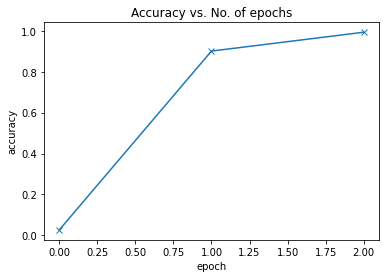

In [43]:
plot_accuracies(history)

# Learning Rate overtime

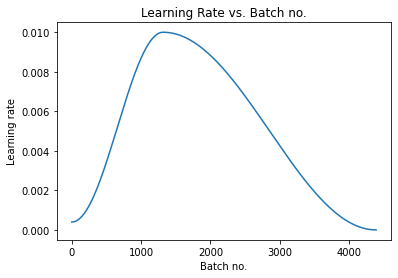

In [51]:
plot_lrs(history)

# Testing Model

In [69]:
test_dir = data_dir + "/test"

# convert_tensor = transforms.ToTensor()

# convert_tensor(test_dir)
test = ImageFolder(test_dir, transform=transforms.ToTensor())


In [70]:
test_images = sorted(os.listdir(test_dir + '/test')) 
# since images in test folder are in alphabetical order
test_images

['.ipynb_checkpoints',
 'AppleCedarRust1.JPG',
 'AppleCedarRust2.JPG',
 'AppleCedarRust3.JPG',
 'AppleCedarRust4.JPG',
 'AppleScab1.JPG',
 'AppleScab2.JPG',
 'AppleScab3.JPG',
 'CornCommonRust1.JPG',
 'CornCommonRust2.JPG',
 'CornCommonRust3.JPG',
 'PotatoEarlyBlight1.JPG',
 'PotatoEarlyBlight2.JPG',
 'PotatoEarlyBlight3.JPG',
 'PotatoEarlyBlight4.JPG',
 'PotatoEarlyBlight5.JPG',
 'PotatoHealthy1.JPG',
 'PotatoHealthy2.JPG',
 'TomatoEarlyBlight1.JPG',
 'TomatoEarlyBlight2.JPG',
 'TomatoEarlyBlight3.JPG',
 'TomatoEarlyBlight4.JPG',
 'TomatoEarlyBlight5.JPG',
 'TomatoEarlyBlight6.JPG',
 'TomatoHealthy1.JPG',
 'TomatoHealthy2.JPG',
 'TomatoHealthy3.JPG',
 'TomatoHealthy4.JPG',
 'TomatoYellowCurlVirus1.JPG',
 'TomatoYellowCurlVirus2.JPG',
 'TomatoYellowCurlVirus3.JPG',
 'TomatoYellowCurlVirus4.JPG',
 'TomatoYellowCurlVirus5.JPG',
 'TomatoYellowCurlVirus6.JPG']

In [75]:
def predict_image(img, model):
    """Converts image to array and return the predicted class
        with highest probability"""
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label

    return train.classes[preds[0].item()]

Label: .ipynb_checkpoints , Predicted: Apple___Cedar_apple_rust


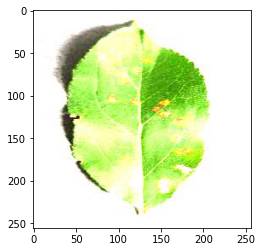

In [73]:
# predicting first image
img, label = test[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[0], ', Predicted:', predict_image(img, model))

In [80]:
# getting all predictions (actual label vs predicted)
for i, (img, label) in enumerate(test):
    print('Label:', test_images[i], ', Predicted:', predict_image(img, model))

Label: .ipynb_checkpoints , Predicted: Apple___Cedar_apple_rust
Label: AppleCedarRust1.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleCedarRust2.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleCedarRust3.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleCedarRust4.JPG , Predicted: Apple___Apple_scab
Label: AppleScab1.JPG , Predicted: Apple___Apple_scab
Label: AppleScab2.JPG , Predicted: Apple___Apple_scab
Label: AppleScab3.JPG , Predicted: Corn_(maize)___Common_rust_
Label: CornCommonRust1.JPG , Predicted: Corn_(maize)___Common_rust_
Label: CornCommonRust2.JPG , Predicted: Corn_(maize)___Common_rust_
Label: CornCommonRust3.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight1.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight2.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight3.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight4.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight5.JPG , Predicted: Potato___h

As we can see here the model is predicting all the test images perfectly!

# Saving the Model

**Saving the entire Model**

This save/load process uses the most intuitive syntax and involves the least amount of code. Saving a model in this way will save the entire module using Python’s pickle module. The disadvantage of this approach is that the serialized data is bound to the specific classes and the exact directory structure used when the model is saved. The reason for this is because pickle does not save the model class itself. Rather, it saves a path to the file containing the class, which is used during load time. Because of this, your code can break in various ways when used in other projects or after refactors.

In [83]:
PATH = './plant.pkl'
torch.save(model, PATH)

In [84]:
PATH = './plantState.pkl'  
torch.save(model.state_dict(), PATH)

When saving a model for inference, it is only necessary to save the trained model’s learned parameters. Saving the model’s state_dict with the torch.save() function will give you the most flexibility for restoring the model later, which is why it is the recommended method for saving models.

A common PyTorch convention is to save models using either a .pt or .pth file extension.

Remember that you must call model.eval() to set dropout and batch normalization layers to evaluation mode before running inference. Failing to do this will yield inconsistent inference results.

In [85]:
PATH = './plantState.pth'  
torch.save(model.state_dict(), PATH)